In [53]:
from typing import List

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure
plt.ion()

In [34]:
NUM_EPISODES = 100000
START_STATE = 500
ALPHA = 2e-5
        

<h1> Implementation of 1000 state random walk with equiprobable jump of 100 states on both sides <h1>

In [57]:
q = np.zeros(10)
all_states = []
for i in range(NUM_EPISODES):
    current_state = START_STATE
    states = []
    ret = 0
    while True:
        states.append(current_state)
        all_states.append(current_state)
        right = current_state + 100
        left = current_state - 100
        if np.random.rand() > 0.5:
            current_state = np.random.randint(current_state+1,right+1)
            if current_state > 1000:
                ret = 1
                break
        else:
            current_state = np.random.randint(left,current_state)
            if current_state < 1:
                ret = -1
                break      
        states.append(current_state)
    for state in states:
        idx = (state - 1) // 100
        q[idx] = q[idx] + ALPHA * (ret - q[idx])


<h1> Plot the value function and state distribution </h1>

(array([0.00015196, 0.00015015, 0.00014629, 0.00015401, 0.00015569,
        0.00015714, 0.00015569, 0.00017413, 0.00016702, 0.00016895,
        0.00016991, 0.00017184, 0.00017172, 0.00017413, 0.00018678,
        0.00018329, 0.00019353, 0.00018461, 0.00019112, 0.00020426,
        0.00019715, 0.00020305, 0.00020365, 0.00020703, 0.00021667,
        0.00021378, 0.00021932, 0.00022836, 0.00022764, 0.00022053,
        0.00021751, 0.00022571, 0.00022824, 0.00024041, 0.00024535,
        0.00024089, 0.0002339 , 0.0002527 , 0.00024414, 0.00025065,
        0.00025535, 0.00024836, 0.00025595, 0.00026523, 0.00027054,
        0.0002762 , 0.00027343, 0.00026849, 0.0002774 , 0.00027222,
        0.00028476, 0.00028319, 0.00029247, 0.00030645, 0.00029717,
        0.00029861, 0.00031127, 0.00030126, 0.00030705, 0.00031669,
        0.00032995, 0.00031669, 0.00032729, 0.00033416, 0.00034163,
        0.00035115, 0.00033802, 0.00035344, 0.00034886, 0.00034633,
        0.00036176, 0.00036959, 0.00036092, 0.00

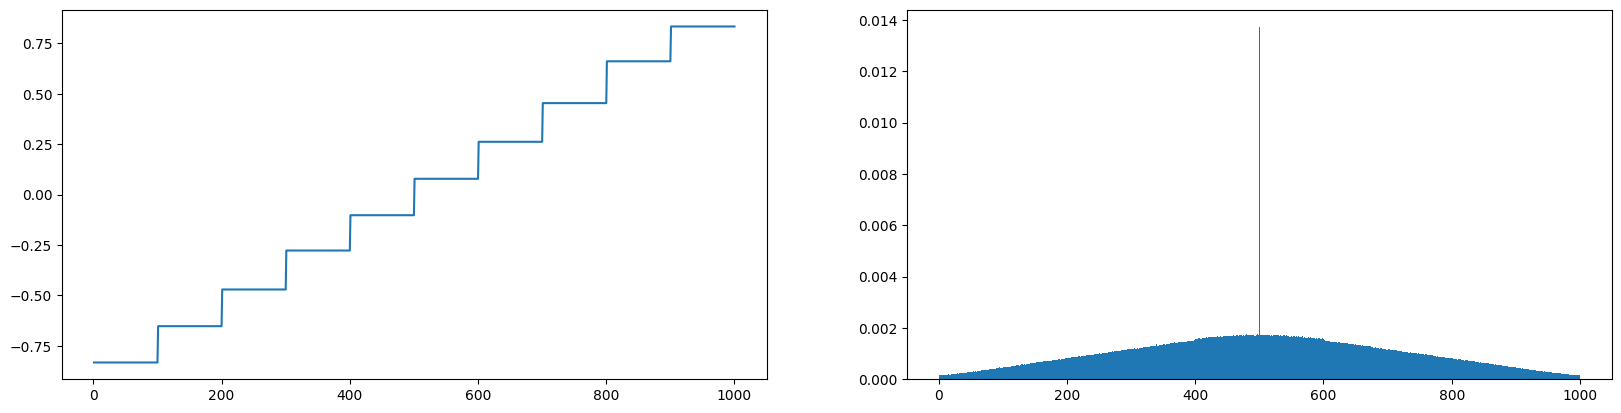

In [59]:
fig:Figure
ax:List[Axes]
fig,ax = plt.subplots(1,2)
fig.set_figwidth(20)
q_rep = [ q_val for q_val in q for _ in range(100)]
ax[0].plot(np.arange(1,1001),q_rep)
ax[1].hist(all_states,bins=1000,density=True)